In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [465]:
da = pd.read_csv('/content/tarantino.csv')
da.head()

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


In [466]:
df=da[da['type']=='death']
df

,movie,type,word,minutes_in
268,Reservoir Dogs,death,NaN,59.93
385,Reservoir Dogs,death,NaN,85.58
386,Reservoir Dogs,death,NaN,85.58
387,Reservoir Dogs,death,NaN,85.81
389,Reservoir Dogs,death,NaN,86.55
...,...,...,...,...
1521,Django Unchained,death,NaN,160.45
1625,Jackie Brown,death,NaN,23.08
1807,Jackie Brown,death,NaN,113.28
1840,Jackie Brown,death,NaN,125.43


In [467]:
da['word'].unique()

array(['dick', 'dicks', 'fucked', 'fucking', 'bullshit', 'fuck', 'shit',
       'motherfucker', 'pussy', 'fucks', 'hell', 'jap', 'bastard',
       'goddamn', 'motherfuckers', 'asshole', 'ass', 'assholes',
       'n-word ', 'asses', 'bitch', 'fuckup', 'fucker', 'shitty',
       'asshead', 'damn', nan, 'damned', 'bitches', 'wetback', 'faggot',
       'cocksucker', 'gook', 'fuckers', 'gooks', 'motherfucking',
       'dickless', 'chickenshit', 'slope', 'fuckhead', 'merde',
       'shithead', 'cunt', 'cunts', 'fuckface', 'cockblockery', 'japs',
       'jew (verb)', 'bastards', 'horeshit', 'shitless', 'shitting',
       'negro ', 'squaw', 'slut', 'goddamned', 'jackass', 'horseshit',
       'shittiest', 'shitload', 'dumbass'], dtype=object)

In [468]:
new_df = da[da['word'].str.contains('(fuck)', regex= True, na=False)]
da=da[da['word'].str.contains('(fuck)', regex= True, na=False)!=True]

new_df1 = da[da['word'].str.contains('(dick)', regex= True, na=False)]
da=da[da['word'].str.contains('(dick)', regex= True, na=False)!=True]

new_df2 = da[da['word'].str.contains('(cunt)', regex= True, na=False)]
da=da[da['word'].str.contains('(cunt)', regex= True, na=False)!=True]

new_df3 = da[da['word'].str.contains('(ass)', regex= True, na=False)]
da=da[da['word'].str.contains('(ass)', regex= True, na=False)!=True]

new_df4 = da[da['word'].str.contains('(shit)', regex= True, na=False)]
da=da[da['word'].str.contains('(shit)', regex= True, na=False)!=True]

new_df5 = da[da['word'].str.contains('(bitch)', regex= True, na=False)]
da=da[da['word'].str.contains('(bitch)', regex= True, na=False)!=True]

new_df6 = da[da['word'].str.contains('(gook)', regex= True, na=False)]
da=da[da['word'].str.contains('(gook)', regex= True, na=False)!=True]

new_df7 = da[da['word'].str.contains('(damn)', regex= True, na=False)]
da=da[da['word'].str.contains('(damn)', regex= True, na=False)!=True]

new_df8 = da[da['word'].str.contains('(jap)', regex= True, na=False)]
da=da[da['word'].str.contains('(jap)', regex= True, na=False)!=True]

new_df9 = da[da['word'].str.contains('(cock)', regex= True, na=False)]
da=da[da['word'].str.contains('(cock)', regex= True, na=False)!=True]


/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [0]:
new_df['swear']='fuck'
new_df1['swear']='dick'
new_df2['swear']='cunt'
new_df3['swear']='ass'
new_df4['swear']='shit'
new_df5['swear']='bitch'
new_df6['swear']='gook'
new_df7['swear']='damn'
new_df8['swear']='jap'
new_df9['swear']='cock'
da['swear']=da['word']

In [470]:
data = pd.concat([da, new_df,new_df1,new_df2,new_df3,new_df4,new_df5,new_df6,new_df7,new_df8,new_df9], ignore_index=True, sort =False)
data.head()

,movie,type,word,minutes_in,swear
0,Reservoir Dogs,word,pussy,2.15,pussy
1,Reservoir Dogs,word,hell,2.48,hell
2,Reservoir Dogs,word,bastard,7.38,bastard
3,Reservoir Dogs,word,hell,27.21,hell
4,Reservoir Dogs,word,hell,29.18,hell


In [471]:
data['swear'].unique()
len(data)

1894

In [0]:
data["time_in"] = pd.cut(data.minutes_in, [10*i for i in range(18)])

In [473]:
data

,movie,type,word,minutes_in,swear,time_in
0,Reservoir Dogs,word,pussy,2.15,pussy,"(0, 10]"
1,Reservoir Dogs,word,hell,2.48,hell,"(0, 10]"
2,Reservoir Dogs,word,bastard,7.38,bastard,"(0, 10]"
3,Reservoir Dogs,word,hell,27.21,hell,"(20, 30]"
4,Reservoir Dogs,word,hell,29.18,hell,"(20, 30]"
...,...,...,...,...,...,...
1889,Kill Bill: Vol. 2,word,japs,15.53,jap,"(10, 20]"
1890,Kill Bill: Vol. 2,word,japs,49.20,jap,"(40, 50]"
1891,Reservoir Dogs,word,cocksucker,90.91,cock,"(90, 100]"
1892,Kill Bill: Vol. 1,word,cocksucker,19.73,cock,"(10, 20]"


In [474]:
data.isnull().sum()

movie           0
type            0
word          190
minutes_in      0
swear         190
time_in         0
dtype: int64

In [0]:
data.dropna(inplace=True)


In [476]:
data.head()

,movie,type,word,minutes_in,swear,time_in
0,Reservoir Dogs,word,pussy,2.15,pussy,"(0, 10]"
1,Reservoir Dogs,word,hell,2.48,hell,"(0, 10]"
2,Reservoir Dogs,word,bastard,7.38,bastard,"(0, 10]"
3,Reservoir Dogs,word,hell,27.21,hell,"(20, 30]"
4,Reservoir Dogs,word,hell,29.18,hell,"(20, 30]"


In [477]:
my_list=list(data['swear'].unique())
my_list=sorted(my_list)
my_list

['ass',
 'bastard',
 'bastards',
 'bitch',
 'cock',
 'cunt',
 'damn',
 'dick',
 'faggot',
 'fuck',
 'gook',
 'hell',
 'jap',
 'jew (verb)',
 'merde',
 'n-word ',
 'negro ',
 'pussy',
 'shit',
 'slope',
 'slut',
 'squaw',
 'wetback']

In [478]:
count_data=data.groupby(['movie','swear']).agg({"swear":np.size}).unstack()
count_data.columns=my_list
count_data

,ass,bastard,bastards,bitch,cock,cunt,damn,dick,faggot,fuck,gook,hell,jap,jew (verb),merde,n-word,negro,pussy,shit,slope,slut,squaw,wetback
movie,,,,,,,,,,,,,,,,,,,,,,,
Django Unchained,29.0,1.0,NaN,15.0,NaN,NaN,42.0,NaN,NaN,32.0,NaN,10.0,NaN,NaN,NaN,114.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN
Inglorious Basterds,6.0,NaN,NaN,2.0,NaN,NaN,12.0,NaN,NaN,21.0,NaN,4.0,NaN,NaN,NaN,NaN,5.0,NaN,6.0,NaN,1.0,1.0,NaN
Jackie Brown,53.0,NaN,NaN,14.0,NaN,NaN,36.0,1.0,NaN,140.0,NaN,10.0,NaN,NaN,NaN,39.0,NaN,1.0,74.0,NaN,NaN,NaN,NaN
Kill Bill: Vol. 1,3.0,2.0,NaN,8.0,1.0,2.0,9.0,1.0,NaN,17.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,1.0,10.0,NaN,NaN,NaN,NaN
Kill Bill: Vol. 2,9.0,2.0,1.0,6.0,1.0,1.0,7.0,NaN,NaN,24.0,NaN,1.0,2.0,1.0,NaN,NaN,NaN,4.0,10.0,NaN,NaN,NaN,NaN
Pulp Fiction,38.0,NaN,NaN,15.0,NaN,NaN,36.0,2.0,NaN,267.0,3.0,5.0,NaN,NaN,1.0,21.0,NaN,1.0,78.0,1.0,NaN,NaN,1.0
Reservoir Dogs,24.0,5.0,NaN,13.0,1.0,NaN,12.0,16.0,1.0,271.0,NaN,12.0,1.0,NaN,NaN,5.0,NaN,4.0,55.0,NaN,NaN,NaN,1.0


In [479]:
x=pd.DataFrame(data['swear'].value_counts())
x

,swear
fuck,772
shit,252
n-word,179
ass,162
damn,154
bitch,73
hell,45
dick,20
pussy,11
bastard,10


In [480]:
x/x.sum()

,swear
fuck,0.453052
shit,0.147887
n-word,0.105047
ass,0.095070
damn,0.090376
bitch,0.042840
hell,0.026408
dick,0.011737
pussy,0.006455
bastard,0.005869


In [481]:
x['swear_word']=x.index
x

,swear,swear_word
fuck,772,fuck
shit,252,shit
n-word,179,n-word
ass,162,ass
damn,154,damn
bitch,73,bitch
hell,45,hell
dick,20,dick
pussy,11,pussy
bastard,10,bastard


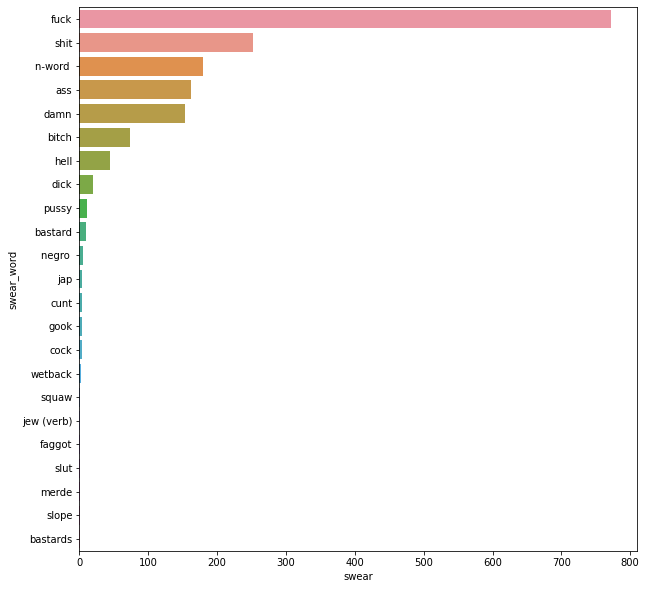

In [497]:
a4_dims = (10,10)
fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(ax=ax,x='swear', y='swear_word',data=x)

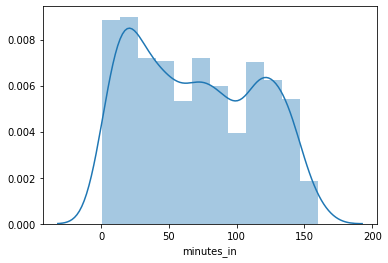

In [483]:
sns.distplot(data['minutes_in'])

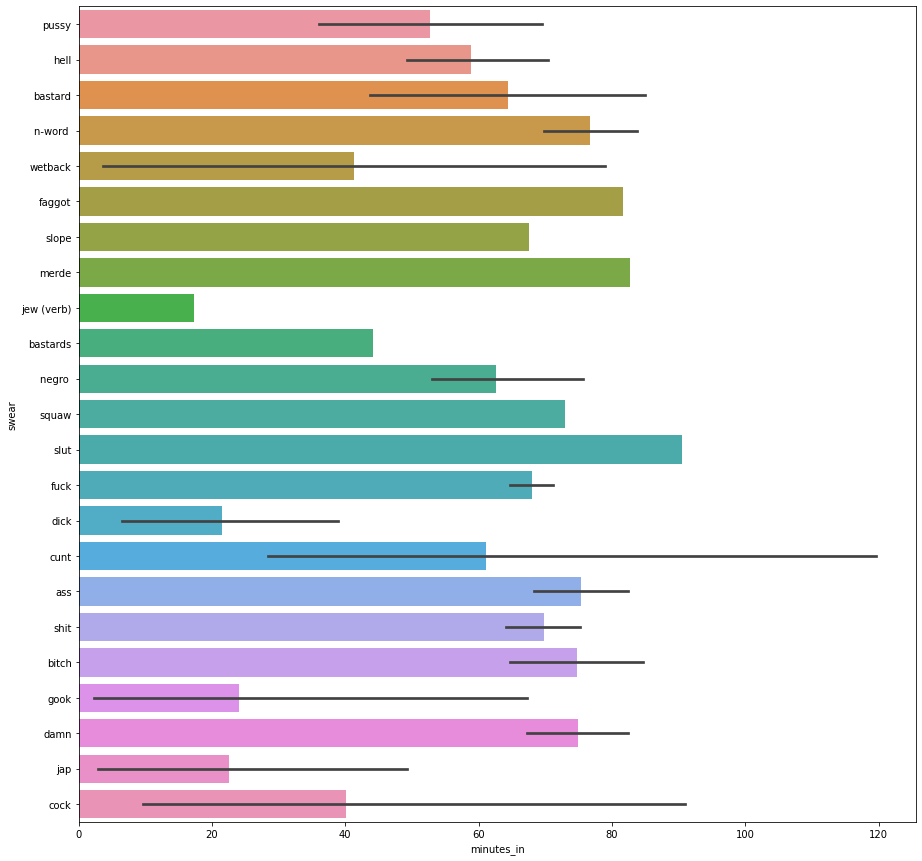

In [484]:
a4_dims = (15,15)
fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(ax=ax,y='swear', x='minutes_in',data=data)


In [485]:
data['swear'].unique()

array(['pussy', 'hell', 'bastard', 'n-word ', 'wetback', 'faggot',
       'slope', 'merde', 'jew (verb)', 'bastards', 'negro ', 'squaw',
       'slut', 'fuck', 'dick', 'cunt', 'ass', 'shit', 'bitch', 'gook',
       'damn', 'jap', 'cock'], dtype=object)

In [486]:
gp2=pd.DataFrame((gp_obj2['swear'].agg(np.size)))
gp2.columns=['count']
gp2['movie']=gp2.index
gp2=gp2.reset_index(drop=True)
gp2

,count,movie
0,262,Django Unchained
1,58,Inglorious Basterds
2,368,Jackie Brown
3,57,Kill Bill: Vol. 1
4,69,Kill Bill: Vol. 2
5,469,Pulp Fiction
6,421,Reservoir Dogs


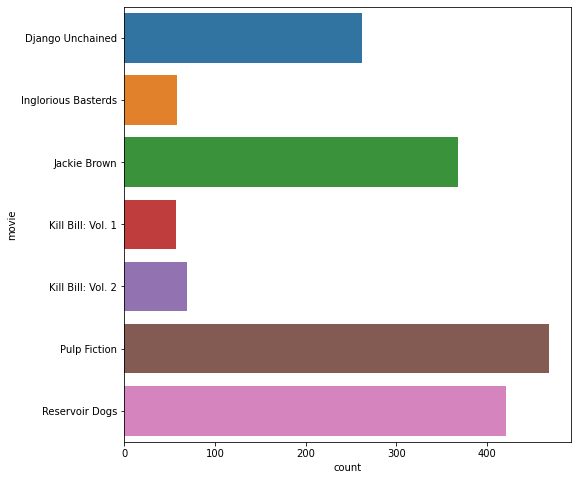

In [487]:
a4_dims = (8,8)
fig, ax = plt.subplots(figsize=a4_dims)

sns.barplot(ax=ax,y='movie',x='count',data=gp2)

In [488]:
data['movie'].unique()

array(['Reservoir Dogs', 'Pulp Fiction', 'Kill Bill: Vol. 1',
       'Kill Bill: Vol. 2', 'Inglorious Basterds', 'Django Unchained',
       'Jackie Brown'], dtype=object)

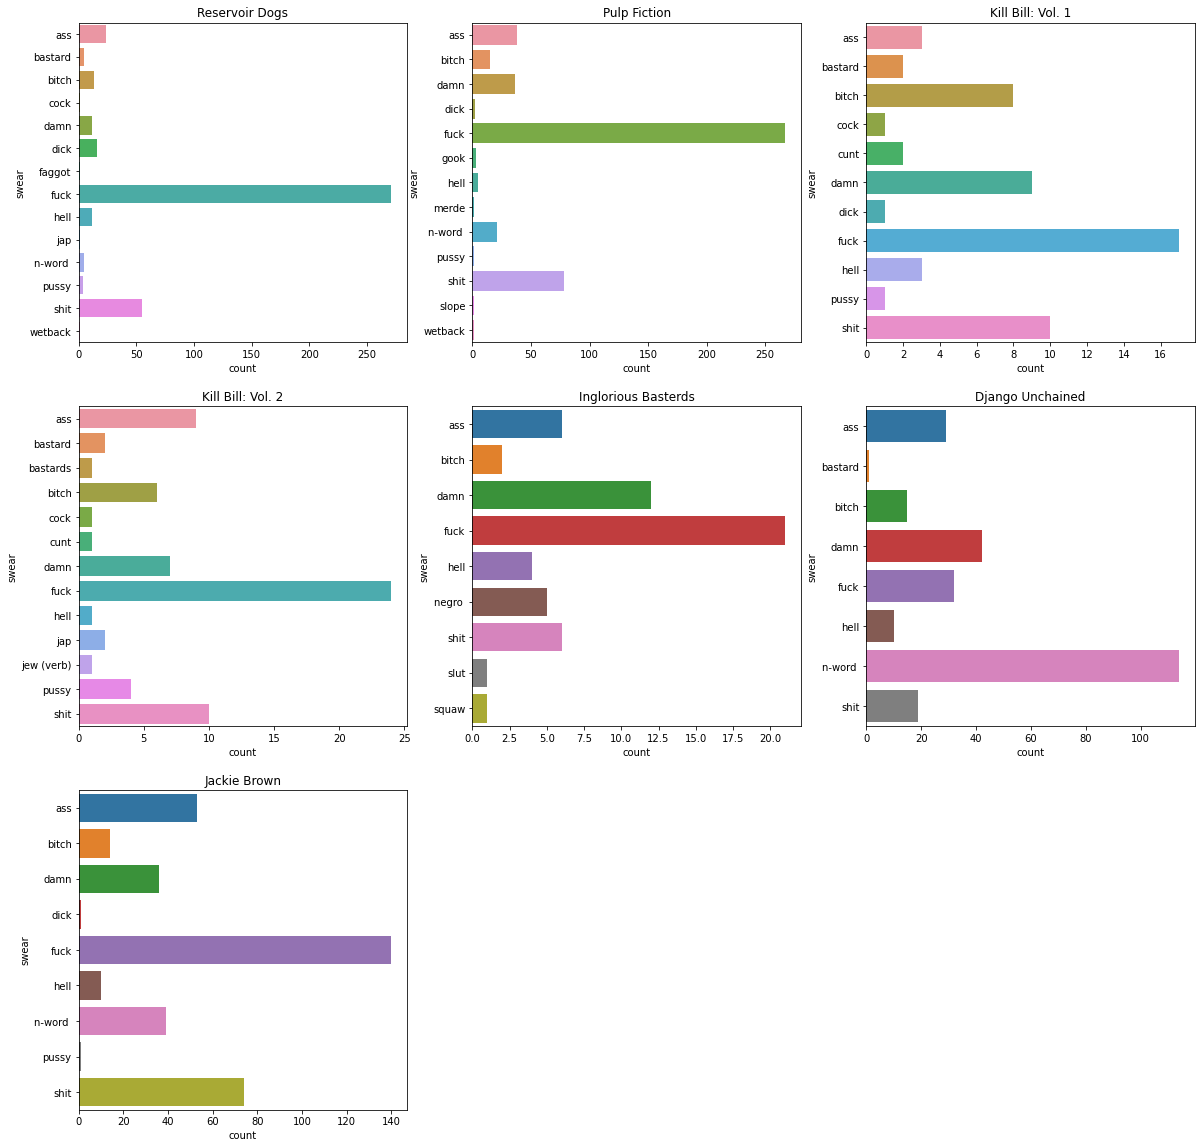

In [489]:
c1=1
fig = plt.figure(figsize=(20,20))
for i in data['movie'].unique():
  df='df_'+i
  #print(df)
  df=data[data['movie']==i].reset_index(drop=True)
  df=df.groupby('swear')
  df=pd.DataFrame((df['swear'].agg(np.size)))
  df.columns=['count']
  df['swear']=df.index
  df=df.reset_index(drop=True)
  #a4_dims = (10,10)
  #fig, ax = plt.subplots(figsize=a4_dims)
  plt.subplot(3, 3, c1)
  #plt.plot(x, y)
  sns.barplot(y='swear', x='count',data=df).set_title(i)
  c1+=1
from google.colab import files
plt.savefig('test.png')
files.download('test.png')

In [490]:
data.head()

,movie,type,word,minutes_in,swear,time_in
0,Reservoir Dogs,word,pussy,2.15,pussy,"(0, 10]"
1,Reservoir Dogs,word,hell,2.48,hell,"(0, 10]"
2,Reservoir Dogs,word,bastard,7.38,bastard,"(0, 10]"
3,Reservoir Dogs,word,hell,27.21,hell,"(20, 30]"
4,Reservoir Dogs,word,hell,29.18,hell,"(20, 30]"


In [498]:
da = pd.read_csv('/content/tarantino.csv')
da.head()

,movie,type,word,minutes_in
0,Reservoir Dogs,word,dick,0.40
1,Reservoir Dogs,word,dicks,0.43
2,Reservoir Dogs,word,fucked,0.55
3,Reservoir Dogs,word,fucking,0.61
4,Reservoir Dogs,word,bullshit,0.61


In [512]:
new_da = pd.DataFrame(da.groupby(['movie','type']).agg({"type": np.size}).unstack())
new_da.columns=['death','swear']
new_da

,death,swear
movie,,
Django Unchained,47,262
Inglorious Basterds,48,58
Jackie Brown,4,368
Kill Bill: Vol. 1,63,57
Kill Bill: Vol. 2,11,69
Pulp Fiction,7,469
Reservoir Dogs,10,421


In [516]:
# high ratio means less deadly but more profane
new_da['swear_death_ratio']=new_da['swear']/new_da['death']
new_da

,death,swear,swear_death_ratio
movie,,,
Django Unchained,47,262,5.574468
Inglorious Basterds,48,58,1.208333
Jackie Brown,4,368,92.000000
Kill Bill: Vol. 1,63,57,0.904762
Kill Bill: Vol. 2,11,69,6.272727
Pulp Fiction,7,469,67.000000
Reservoir Dogs,10,421,42.100000


In [517]:
data.head()

,movie,type,word,minutes_in,swear,time_in
0,Reservoir Dogs,word,pussy,2.15,pussy,"(0, 10]"
1,Reservoir Dogs,word,hell,2.48,hell,"(0, 10]"
2,Reservoir Dogs,word,bastard,7.38,bastard,"(0, 10]"
3,Reservoir Dogs,word,hell,27.21,hell,"(20, 30]"
4,Reservoir Dogs,word,hell,29.18,hell,"(20, 30]"


In [522]:
dn = pd.DataFrame(data.groupby(["time_in"]).agg({"swear": np.size}).unstack())
dn.columns=['count']
dn['time']=dn.index
dn=df = dn.reset_index(drop=True)
dn

,count,time
0,124,"(swear, (0, 10])"
1,178,"(swear, (10, 20])"
2,154,"(swear, (20, 30])"
3,109,"(swear, (30, 40])"
4,131,"(swear, (40, 50])"
5,97,"(swear, (50, 60])"
6,89,"(swear, (60, 70])"
7,126,"(swear, (70, 80])"
8,84,"(swear, (80, 90])"
9,94,"(swear, (90, 100])"


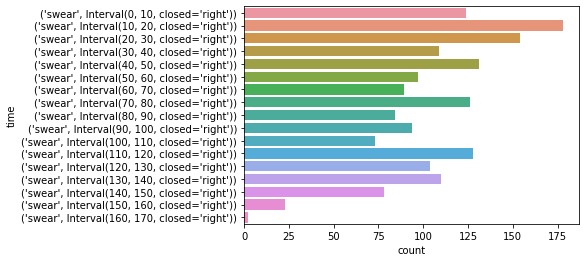

In [524]:
sns.barplot(y='time',x='count',data=dn)